# Расчет числа pi


In [3]:
!pip install matplotlib numpy ipympl

In [9]:
import random

def monte_carlo_pi(number_of_points):
    n_in_circle = 0
    for _ in range(number_of_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
         n_in_circle = n_in_circle + 1
    
    return(4 * n_in_circle / number_of_points)


for n in (10_000, 100_000, 10_000_000):
    print(n, monte_carlo_pi(n))

In [19]:
%matplotlib widget

In [20]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Размер выборки
number_of_points = 5000  # Можно уменьшить для быстрой анимации

# Храним координаты
points_inside = []
points_outside = []

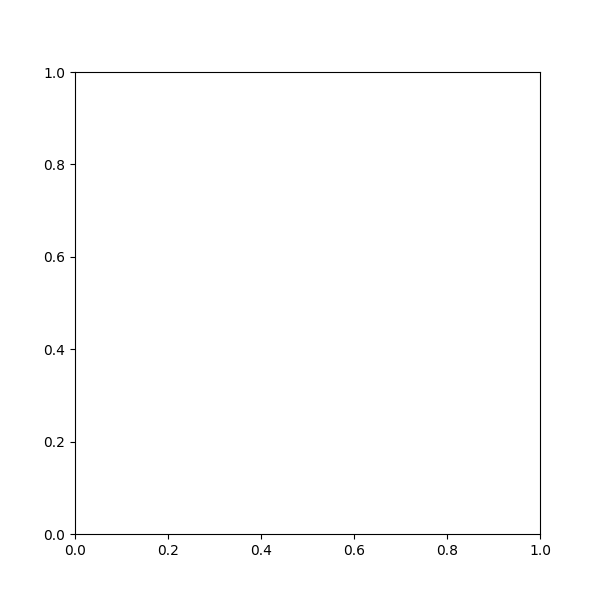

In [22]:
def update(frame):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
        points_inside.append((x, y))
    else:
        points_outside.append((x, y))

    total_points = len(points_inside) + len(points_outside)
    pi_estimate = 4 * len(points_inside) / total_points

    ax.clear()
    ax.set_aspect('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_title(f"Points: {total_points} | π ≈ {pi_estimate:.6f}")

    # Рисуем круг
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_artist(circle)

    # Отображаем точки
    if points_inside:
        x_in, y_in = zip(*points_inside)
        ax.scatter(x_in, y_in, color='green', s=1)

    if points_outside:
        x_out, y_out = zip(*points_outside)
        ax.scatter(x_out, y_out, color='red', s=1)

# Настройка графика
fig, ax = plt.subplots(figsize=(6, 6))

ani = animation.FuncAnimation(fig, update, frames=number_of_points, interval=50)

plt.show()